# 4 - Random Forest v/s Boosted trees

## 4.1 - Random Forest

### Classifier

In [8]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

class RandomForest_Classifier:
    def __init__(self, n_trees=100, max_depth=15,bootstrap=True,sample_fraction=0.75):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []
        self.features_per_tree = []
        self.bootstrap = bootstrap
        self.sample_fraction = sample_fraction
        
    def fit(self, X, y):
        for i in range(self.n_trees):
            tree = DecisionTreeClassifier(max_depth=self.max_depth)
            # bootstrap data samples
            X_sample, y_sample = self.bootstrap_sample(X, y)

            # generate a random num from 1 to X.shape[1]
            n_features = np.random.randint(1, X.shape[1]+1)
            # select random subset of features
            features_index = np.random.choice(range(X.shape[1]), size=n_features, replace=False)
            
            self.features_per_tree.append(features_index)
            X_sample = X_sample[:, features_index]

            # fit decision tree
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)


    def predict(self, X):
        predictions = []
        for i in range(self.n_trees):
            features = self.features_per_tree[i]
            X_sample = X[:, features]
            pred = self.trees[i].predict(X_sample)
            predictions.append(pred)
        predictions = np.array(predictions)
        predictions = predictions.astype(int)
        predictions = predictions.T
        y_pred = []
        for pred in predictions:
            y_pred.append(np.bincount(pred).argmax())
        return np.array(y_pred)
    
    def bootstrap_sample(self, X, y):
        if self.bootstrap:
            # Sampling with replacement
            X_sample, y_sample = resample(X, y, replace=True, n_samples=int(self.sample_fraction * len(X)))
        else:
            # Sampling without replacement
            X_sample, y_sample = resample(X, y, replace=True, n_samples=int(self.sample_fraction * len(X)))

        return X_sample, y_sample

In [9]:
# Example usage with the Wine dataset
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

import pandas as pd

# Load the Wine dataset
wine_data = pd.read_csv('WineQT.csv')
wine_data = wine_data.drop(["Id"],axis=1)
colums = wine_data.columns
wine_data.head()
wine_data = np.array(wine_data)

X = wine_data[:, :-1]
y = wine_data[:, -1] - 3

y[y == 0] = 0
y[y == 1] = 0
y[y == 2] = 0
y[y == 3] = 1
y[y == 4] = 1
y[y == 5] = 1

# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training an(max_depth=3, max_features=3, criterion='gini'd testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForest_Classifier(n_trees=100, max_depth=15, bootstrap=True,sample_fraction=0.75)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy:", np.sum(y_test == y_pred) / len(y_test))

# Compare to a single decision tree
dt = DecisionTreeClassifier(max_depth=15)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("single Decision tree Accuracy:", np.sum(y_test == y_pred) / len(y_test))

# compare to inbuilt random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=15,bootstrap=True)    
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("inbuilt random forest Accuracy:", np.sum(y_test == y_pred) / len(y_test))



Accuracy: 0.777292576419214
single Decision tree Accuracy: 0.6943231441048034
inbuilt random forest Accuracy: 0.7816593886462883


#### Hyperparameter tuning

In [10]:
n_trees = range(1,100,10)
max_depths = [5, 10, 15, 20, 25]
sample_fractions = [0.15,0.25,0.5, 0.75, 1.0]
bootstrap = [True, False]

best_acc = 0
best_n_trees = 0
best_max_depth = 0
best_bootstrap = True
best_sample_fraction = 0


for n_tree in n_trees:
    for max_depth in max_depths:
        for sample_fraction in sample_fractions:
            for boot in bootstrap:
                rf = RandomForest_Classifier(n_trees=n_tree, max_depth=max_depth, bootstrap=boot,sample_fraction=sample_fraction)
                rf.fit(X_train, y_train)
                y_pred = rf.predict(X_test)
                acc = np.sum(y_test == y_pred) / len(y_test)
                if acc > best_acc:
                    best_acc = acc
                    best_n_trees = n_tree
                    best_max_depth = max_depth
                    best_bootstrap = boot
                    best_sample_fraction = sample_fraction

print("Best accuracy:", best_acc)
print("Best n_trees:", best_n_trees)
print("Best max_depth:", best_max_depth)
print("Best bootstrap:", best_bootstrap)
print("Best sample_fraction:", best_sample_fraction)


Best accuracy: 0.8122270742358079
Best n_trees: 61
Best max_depth: 15
Best bootstrap: False
Best sample_fraction: 0.5


In [11]:
best_acc_random_forest_classification = best_acc

### Regression

In [11]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import resample

class RandomForest_Regressor:
    def __init__(self, n_trees=100, max_depth=15,bootstrap=True,sample_fraction=0.75):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []
        self.features_per_tree = []
        self.bootstrap = bootstrap
        self.sample_fraction = sample_fraction
        
    def fit(self, X, y):
        for i in range(self.n_trees):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            # bootstrap data samples
            X_sample, y_sample = self.bootstrap_sample(X, y)

            # generate a random num from 1 to X.shape[1]
            n_features = np.random.randint(1, X.shape[1]+1)
            # select random subset of features
            features_index = np.random.choice(range(X.shape[1]), size=n_features, replace=False)
            
            self.features_per_tree.append(features_index)
            X_sample = X_sample[:, features_index]

            # fit decision tree
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)


    def predict(self, X):
        predictions = []
        for i in range(self.n_trees):
            features = self.features_per_tree[i]
            X_sample = X[:, features]
            pred = self.trees[i].predict(X_sample)
            predictions.append(pred)
        predictions = np.array(predictions)
        predictions = predictions.astype(int)
        predictions = predictions.T
        y_pred = []
        for pred in predictions:
            y_pred.append(np.bincount(pred).argmax())
        return np.array(y_pred)
    
    def bootstrap_sample(self, X, y):
        if self.bootstrap:
            # Sampling with replacement
            X_sample, y_sample = resample(X, y, replace=True, n_samples=int(self.sample_fraction * len(X)))
        else:
            # Sampling without replacement
            X_sample, y_sample = resample(X, y, replace=True, n_samples=int(self.sample_fraction * len(X)))

        return X_sample, y_sample

In [12]:
# Example usage with the Housing dataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the Boston Housing dataset
housing_data = pd.read_csv('HousingData.csv')
columns = housing_data.columns

housing_data = np.array(housing_data)

# replace NA values with mean of column
for i in range(housing_data.shape[1]):
    housing_data[np.isnan(housing_data[:,i]),i] = np.nanmean(housing_data[:,i])

X = housing_data[:, :-1]
y = housing_data[:, -1]

# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training, val and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForest_Regressor(n_trees=100, max_depth=15, bootstrap=True,sample_fraction=0.75)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("MSE", np.sum((y_test - y_pred)**2) / len(y_test))

# Compare to a single decision tree
dt = DecisionTreeRegressor(max_depth=15)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("single decision tree MSE", np.sum((y_test - y_pred)**2) / len(y_test))

# compare to inbuilt random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=15,bootstrap=True)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("inbuilt random forest MSE", np.sum((y_test - y_pred)**2) / len(y_test))



MSE 7.162352941176471
single decision tree MSE 20.792002008804836
inbuilt random forest MSE 10.069507425459578


#### Hyperparameter tuning

In [13]:
n_trees = [5, 20, 50, 100, 200, 500]
max_depths = [5, 10, 15, 20, 25]
sample_fractions = [0.15,0.25,0.5, 0.75, 1.0]
bootstrap = [True, False]

best_mse = 1000000000
best_n_trees = 0
best_max_depth = 0
best_bootstrap = True

for n_tree in n_trees:
    for max_depth in max_depths:
        for sample_fraction in sample_fractions:
            for boot in bootstrap:
                rf = RandomForest_Regressor(n_trees=n_tree, max_depth=max_depth, bootstrap=boot,sample_fraction=sample_fraction)
                rf.fit(X_train, y_train)
                y_pred = rf.predict(X_test)
                mse = np.sum((y_test - y_pred)**2) / len(y_test)
                if mse < best_mse:
                    best_mse = mse
                    best_n_trees = n_tree
                    best_max_depth = max_depth
                    best_bootstrap = boot

print("Best MSE:", best_mse)
print("Best n_trees:", best_n_trees)
print("Best max_depth:", best_max_depth)
print("Best bootstrap:", best_bootstrap)


Best MSE: 7.219215686274511
Best n_trees: 200
Best max_depth: 20
Best bootstrap: False


In [16]:
best_mse_random_forest_regresssion = best_mse

## 4.2 - AdaBoost with Decision Trees

### Classifier

In [12]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# implement AdaBoost Classifier
class AdaBoost_Classifier:
    def __init__(self, n_estimators=100, max_depth=1):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []
        self.alphas = []
        
    def fit(self, X, y):
        # initialize weights
        w = np.ones(len(X)) / len(X)
        for i in range(self.n_estimators):
            tree = DecisionTreeClassifier(max_depth=self.max_depth)
            # fit decision tree
            tree.fit(X, y, sample_weight=w)
            # compute error
            y_pred = tree.predict(X)
            err = np.sum(w[y_pred != y])
            # compute alpha
            alpha = 0.5 * np.log((1 - err) / max(err, 1e-10))
            # update weights
            w *= np.exp(-alpha * y * y_pred)
            w /= np.sum(w)
            self.trees.append(tree)
            self.alphas.append(alpha)
            
    def predict(self, X):
        # take weighted sum of predictions
        pred = np.zeros(len(X))
        for i in range(self.n_estimators):
            pred += self.alphas[i] * self.trees[i].predict(X)
        # convert to sign
        return np.sign(pred)
    


In [25]:
# Example usage with the Wine dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import pandas as pd

# Load the Wine dataset
wine_data = pd.read_csv('WineQT.csv')
wine_data = wine_data.drop(["Id"],axis=1)
colums = wine_data.columns
wine_data.head()

wine_data = np.array(wine_data)

X = wine_data[:, :-1]
y = wine_data[:, -1] - 3

# convert labels to 0 and 1
y[y == 0] = -1
y[y == 1] = -1
y[y == 2] = -1
y[y == 3] = 1
y[y == 4] = 1
y[y == 5] = 1

# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)


#### Hyperparameter tuning

In [26]:
import time
num_estimators = range(1, 100, 10)
stub_depths = [1, 2, 3]

best_acc = 0
best_num_estimators = 0
best_stub_depth = 0

training_time_num_est = []
accuracy_num_est = []

for num_estimator in num_estimators:
    start_time = time.time()
    best_acc_est = 0
    for stub_depth in stub_depths:
        ada = AdaBoost_Classifier(n_estimators=num_estimator, max_depth=stub_depth)
        ada.fit(X_train, y_train)
        y_pred = ada.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc_est:
            best_acc_est = acc
        if acc > best_acc:
            best_acc = acc
            best_num_estimators = num_estimator
            best_stub_depth = stub_depth
    end_time = time.time()
    accuracy_num_est.append(best_acc_est*100)
    training_time_num_est.append(end_time-start_time)


print("Best accuracy:", best_acc*100)
print("Best num_estimators:", best_num_estimators)
print("Best stub_depth:", best_stub_depth)


Best accuracy: 81.3953488372093
Best num_estimators: 21
Best stub_depth: 2


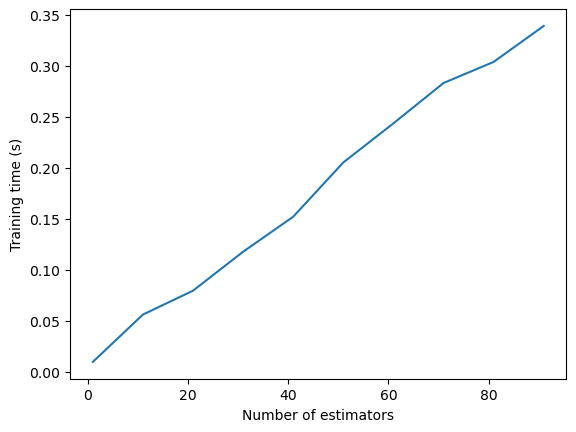

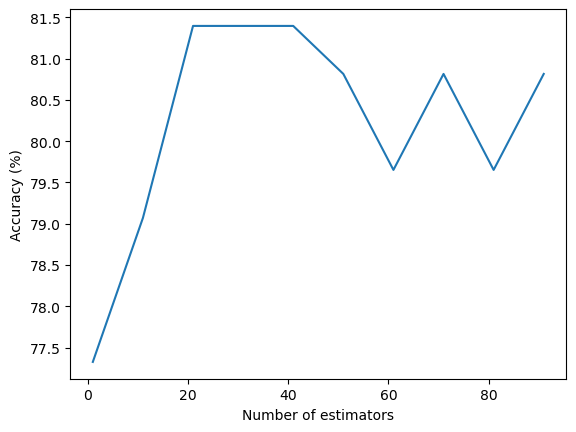

In [28]:
# plot the training time vs number of estimators
import matplotlib.pyplot as plt
plt.plot(num_estimators, training_time_num_est)
plt.xlabel("Number of estimators")
plt.ylabel("Training time (s)")
plt.show()

# plot the accuracy vs number of estimators
plt.plot(num_estimators, accuracy_num_est)
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy (%)")
plt.show()


In [27]:
print("Adaboost accuracy:", best_acc*100)
print("Random forest classification accuracy:", best_acc_random_forest_classification*100)

Adaboost accuracy: 81.3953488372093
Random forest classification accuracy: 81.22270742358079


### Regression

In [75]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

def weighted_median(values, weights):
    
    sorted_indices = values.argsort()
    values = values[sorted_indices]
    weights = weights[sorted_indices]
    weights_cumulative_sum = weights.cumsum()
    median_weight = np.argmax(weights_cumulative_sum >= sum(weights)/2)
    return values[median_weight]

class AdaBoost_Regressor:
    def __init__(self, n_estimators=100, max_depth=1):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []
        self.alphas = []
        
    def fit(self, X, y):
        # initialize weights
        w = np.ones(len(X)) / len(X)
        for i in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            # fit decision tree
            tree.fit(X, y, sample_weight=w)
            # compute error
            y_pred = tree.predict(X)
            err = np.sum((w * np.abs(y_pred - y))/np.max(y_pred - y))
            # compute alpha
            alpha = err/(1-err)
            # update weights
            w *= alpha ** (1 - err)
            w /= np.sum(w)
            self.trees.append(tree)
            self.alphas.append(alpha)
            
    # def predict(self, X):
    #     # take weighted sum of predictions
    #     pred = np.zeros(len(X))
    #     for i in range(self.n_estimators):
    #         pred -= np.log(self.alphas[i]) * self.trees[i].predict(X)
    #     # convert to sign
    #     return pred

    def predict(self, X_test):
        N_test = len(X_test)
        fitted_values = np.empty((N_test, self.n_estimators))
        for t, tree in enumerate(self.trees):
            fitted_values[:,t] = tree.predict(X_test)
        alphas = np.array(self.alphas)
        return np.array([weighted_median(fitted_values[n], np.log(1/alphas)) for n in range(N_test)]) 
        
        

In [76]:
# Example usage with the Housing dataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Load the Boston Housing dataset
housing_data = pd.read_csv('HousingData.csv')
columns = housing_data.columns

housing_data = np.array(housing_data)

# replace NA values with mean of column
for i in range(housing_data.shape[1]):
    housing_data[np.isnan(housing_data[:,i]),i] = np.nanmean(housing_data[:,i])

X = housing_data[:, :-1]
y = housing_data[:, -1]

# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#### Hyperparameter tuning

In [77]:
import time
num_estimators = range(1, 100, 10)
stub_depths = [1, 2, 3]

best_mse = np.inf
best_num_estimators = 0
best_stub_depth = 0

training_time_num_est = []

for num_estimator in num_estimators:
    start_time = time.time()
    for stub_depth in stub_depths:
        ada = AdaBoost_Regressor(n_estimators=num_estimator, max_depth=stub_depth)
        ada.fit(X_train, y_train)
        y_pred = ada.predict(X_test)
        mse = np.sum((y_test - y_pred)**2) / len(y_test)
        if mse < best_mse:
            best_mse = mse
            best_num_estimators = num_estimator
            best_stub_depth = stub_depth
    end_time = time.time()
    training_time_num_est.append(end_time-start_time)

print("Best mse:", best_mse)
print("Best num_estimators:", best_num_estimators)
print("Best stub_depth:", best_stub_depth)
    

Best mse: 23.445501797563324
Best num_estimators: 51
Best stub_depth: 3


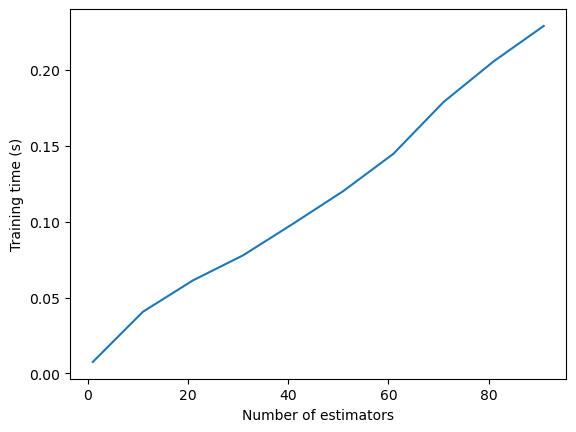

In [78]:
# plot the training time vs number of estimators
import matplotlib.pyplot as plt
plt.plot(num_estimators, training_time_num_est)
plt.xlabel("Number of estimators")
plt.ylabel("Training time (s)")
plt.show()

In [79]:
print("Adaboost MSE:", best_mse)
print("Random forest regression MSE:", best_mse_random_forest_regresssion)

Adaboost MSE: 23.445501797563324
Random forest regression MSE: 7.219215686274511


## 4.3 - Gradient Boosting

### Classifier

In [80]:
# implementation of gradient boosting for classification
import numpy as np
from sklearn.tree import DecisionTreeRegressor

class GradientBoosting_Classifier:
    def __init__(self, learning_rate=0.1, max_depth=3, n_estimators=100):
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.n_estimators = n_estimators
        self.trees = []
        self.f0 = None
        self.f0_pred = None
        
    def fit(self, X, y):
        self.f0 = np.log(np.sum(y) / (len(y) - np.sum(y)))
        self.f0_pred = np.repeat(self.f0, len(y))
        for i in range(self.n_estimators):
            # calculate pseudo-residuals
            pseudo_residuals = y - 1 / (1 + np.exp(-self.f0_pred))
            # fit regression tree to pseudo-residuals
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, pseudo_residuals)
            self.trees.append(tree)
            # update f0_pred
            self.f0_pred += self.learning_rate * tree.predict(X)
            
    def predict(self, X):
        f0_pred = np.repeat(self.f0, len(X))
        for tree in self.trees:
            f0_pred += self.learning_rate * tree.predict(X)
        return np.round(1 / (1 + np.exp(-f0_pred)))
    
    def score(self, X, y):
        return np.mean(self.predict(X) == y)

In [82]:

# Load the Wine dataset
wine_data = pd.read_csv('WineQT.csv')
wine_data = wine_data.drop(["Id"],axis=1)
colums = wine_data.columns
wine_data.head()

wine_data = np.array(wine_data)

X = wine_data[:, :-1]
y = wine_data[:, -1] - 3

# convert labels to 0 and 1
y[y == 1] = 0
y[y == 0] = 0
y[y == 2] = 0
y[y == 3] = 1
y[y == 4] = 1
y[y == 5] = 1

# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Hyperparameter tuning

In [83]:
import time
num_estimators = range(1, 100, 10)
max_depths = [1, 2, 3, 4, 5]
learning_rates = [0.01, 0.1, 0.5, 1.0]

best_acc = 0
best_num_estimators = 0
best_max_depth = 0
best_learning_rate = 0

training_time_num_est = []
accuracy_num_est = []

for num_estimator in num_estimators:
    start_time = time.time()
    for max_depth in max_depths:
        for learning_rate in learning_rates:
            gb = GradientBoosting_Classifier(learning_rate=learning_rate, max_depth=max_depth, n_estimators=num_estimator)
            gb.fit(X_train, y_train)
            y_pred = gb.predict(X_test)
            acc = np.sum(y_test == y_pred) / len(y_test)
            if acc > best_acc:
                best_acc = acc
                best_num_estimators = num_estimator
                best_max_depth = max_depth
                best_learning_rate = learning_rate
    end_time = time.time()
    accuracy_num_est.append(best_acc*100)
    training_time_num_est.append(end_time-start_time)

print("Best accuracy:", best_acc)
print("Best num_estimators:", best_num_estimators)
print("Best max_depth:", best_max_depth)
print("Best learning_rate:", best_learning_rate)

Best accuracy: 0.7947598253275109
Best num_estimators: 41
Best max_depth: 5
Best learning_rate: 0.5


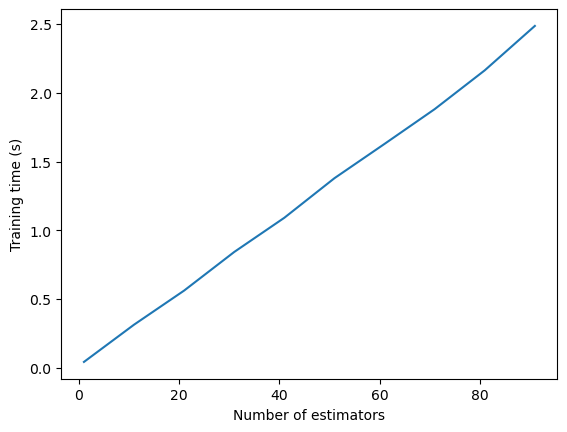

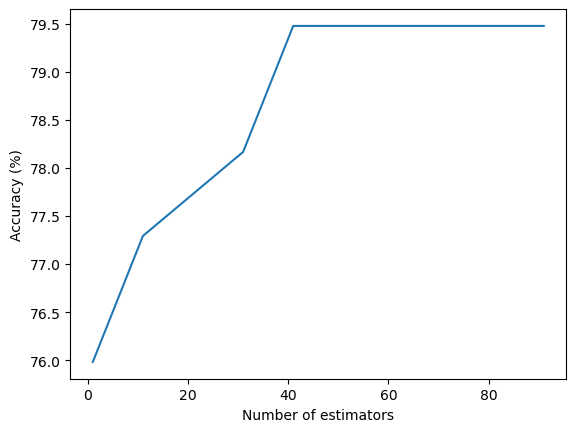

In [84]:
#plot the training time vs number of estimators
import matplotlib.pyplot as plt
plt.plot(num_estimators, training_time_num_est)
plt.xlabel("Number of estimators")
plt.ylabel("Training time (s)")
plt.show()

# plot the accuracy vs number of estimators
plt.plot(num_estimators, accuracy_num_est)
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy (%)")
plt.show()


### Regression

In [85]:
# implementation of gradient boosting for regression
import numpy as np
from sklearn.tree import DecisionTreeRegressor

class GradientBoosting_Regressor:
    def __init__(self, learning_rate=0.1, max_depth=3, n_estimators=100):
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.n_estimators = n_estimators
        self.trees = []
        self.f0 = None
        self.f0_pred = None
        
    def fit(self, X, y):
        self.f0 = np.mean(y)
        self.f0_pred = np.repeat(self.f0, len(y))
        for i in range(self.n_estimators):
            # calculate pseudo-residuals
            pseudo_residuals = y - self.f0_pred
            # fit regression tree to pseudo-residuals
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, pseudo_residuals)
            self.trees.append(tree)
            # update f0_pred
            self.f0_pred += self.learning_rate * tree.predict(X)
            
    def predict(self, X):
        f0_pred = np.repeat(self.f0, len(X))
        for tree in self.trees:
            f0_pred += self.learning_rate * tree.predict(X)
        return f0_pred
    
    def score(self, X, y):
        return np.mean((self.predict(X) - y)**2)
    

In [86]:
# Example usage with the Housing dataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Load the Boston Housing dataset
housing_data = pd.read_csv('HousingData.csv')
columns = housing_data.columns
housing_data = np.array(housing_data)

# replace NA values with mean of column
for i in range(housing_data.shape[1]):
    housing_data[np.isnan(housing_data[:,i]),i] = np.nanmean(housing_data[:,i])

X = housing_data[:, :-1]
y = housing_data[:, -1]

# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

gb = GradientBoosting_Regressor(learning_rate=0.1, max_depth=3, n_estimators=100)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print("MSE", np.sum((y_test - y_pred)**2) / len(y_test))

# Compare to inbuilt GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=100)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print("Inbuilt MSE", np.sum((y_test - y_pred)**2) / len(y_test))



MSE 8.63403213756569
Inbuilt MSE 8.865332188496735


#### Hyperparameter tuning

In [88]:
import time
num_estimators = range(1, 100, 10)
max_depths = [1, 2, 3, 4, 5]
learning_rates = [0.01, 0.1, 0.5, 1.0]

best_mse = np.inf
best_num_estimators = 0
best_max_depth = 0
best_learning_rate = 0

training_time_num_est = []

for num_estimator in num_estimators:
    start_time = time.time()
    for max_depth in max_depths:
        for learning_rate in learning_rates:
            gb = GradientBoosting_Regressor(learning_rate=learning_rate, max_depth=max_depth, n_estimators=num_estimator)
            gb.fit(X_train, y_train)
            y_pred = gb.predict(X_test)
            mse = np.sum((y_test - y_pred)**2) / len(y_test)
            if mse < best_mse:
                best_mse = mse
                best_num_estimators = num_estimator
                best_max_depth = max_depth
                best_learning_rate = learning_rate
    end_time = time.time()
    training_time_num_est.append(end_time-start_time)

print("Best mse:", best_mse)
print("Best num_estimators:", best_num_estimators)
print("Best max_depth:", best_max_depth)
print("Best learning_rate:", best_learning_rate)

Best mse: 8.04394045694225
Best num_estimators: 11
Best max_depth: 3
Best learning_rate: 0.5


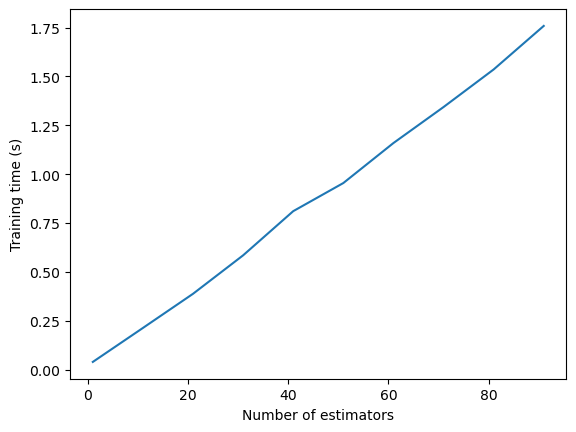

In [89]:
# plot the training time vs number of estimators
import matplotlib.pyplot as plt
plt.plot(num_estimators, training_time_num_est)
plt.xlabel("Number of estimators")
plt.ylabel("Training time (s)")
plt.show()

### Analysis of the mistakes of these models

These models are sensitive to noisy data and tends to overfit on the noise and outliers. So, they are prone to overfitting. 

For smaller dimension data, there is a strong reduction of randomness, so random forest would lose their edge over decision trees. Moreover, random forest tends to become slower with the increasing number of trees. 


### Feature Similarity

The most striking similarity of all these models is the fact that all of them are prone to noisy labels and outliers. Thus, one needs to prepare quality data before training these models. This is because the classifiers employed by these models are decision trees, which do not handle outliers or noisy data sets.